# Asexual models

In [ ]:
!time pip install rdkit-pypi==2021.09.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 16.5 MB/s eta 0:00:00

real	0m17.484s
user	0m8.342s
sys	0m1.416s


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sn
# import scipy as sp
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

import random
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold


In [ ]:
axl= pd.read_csv("M_asexuals_lib_hits_nd_clst_nhts.csv")
axl['Hit'] = axl['Hit'].replace(np.nan, "No")
axl = axl.iloc[: , 1:]
print(axl['Hit'].value_counts())
axl

/content/drive/MyDrive/PhD/PTS_datasets
 ABSActiveInactiveFeatCorrelationOnABSActives.csv
 ABSActiveInactiveFeatCorrelationOnABSInactives.csv
 absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualLRFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualRFFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 asexualsFeaturesZtestprop.csv
 asexualsFeaturesZtestpropInact.csv
 asexualsFeaturesZtestproportionsActvsInactv.csv
 asexualsFeaturesZtestpropTopABSfeat.csv
 asexualsFeaturesZtestpropTopDualfeat.csv
 asexualsFeaturesZtestpropTopfeat.csv
 asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl
 asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl
 axldeepinsighOverUnderXttestMFP.npy
 axldeepinsighOverUnderXttrainMFP.npy
 axldeepinsighOverUnderYttestMFP.npy
 axldeepinsighOverUnderYttrainMFP.npy
 axl_UnderMFP_GBM_HPT5005_FeatureImp.csv
 axl_UnderMFP_LR_HPT_FeatureImp.csv
 axl_UnderMFP_RF_HPT5005_FeatureImp2.csv
 CTCV

,Smiles,Hit
0,Cc1cccnc1CN1CC[C@H](Oc2cccc(F)c2)[C@@](C)(O)C1,Yes
1,CC(C)(C)C(=O)N1C[C@H](c2ccsc2)[C@H]2CN(C3CCCCC...,Yes
2,CC(C)N(CCNC(=O)c1[nH]nc2ccc(I)cc12)C(C)C,Yes
3,CC(Nc1nc(-c2ccncc2)nc2c1CCNC2)c1ccccc1,Yes
4,CC(C)C[C@H](N)COc1cccc(F)c1Oc1cccc(Cl)c1,Yes
...,...,...
59531,O=C1CC[C@H]2[C@H](CCN2C(=O)C2CCOC2)N1Cc1ccncc1,No
59532,Cc1cc(Nc2ccc(F)cn2)cc(C2CCN(Cc3ncc[nH]3)C2)n1,No
59533,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,No
59534,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,No


In [ ]:
# rdkit seems to get stuck at certain parts when converting smiles into mols and
# and gives C++ coverter error. However when I split the dataset at these parts
# this seems to prevent the error.
compounds =[]
df1= axl[:20000]

for _, smiles, hit in df1[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df2= axl[20001:23766]

for _, smiles, hit in df2[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df3= axl[23767:25396]

for _, smiles, hit in df3[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))


df4= axl[25397:25662]

for _, smiles, hit in df4[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df5= axl[25663:26912]

for _, smiles, hit in df5[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df6= axl[26913:28399]

for _, smiles, hit in df6[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df7= axl[28400:]

for _, smiles, hit in df7[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

len(compounds)

59530

In [ ]:
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'Hit'])
axl=dff
axl["Target"] = np.where(axl["Hit"]== "Yes", 1,0)
axl["Target"].value_counts()

,mol,Hit
0,"<img data-content=""rdkit/molecule"" src=""data:i...",Yes
1,"<img data-content=""rdkit/molecule"" src=""data:i...",Yes
2,"<img data-content=""rdkit/molecule"" src=""data:i...",Yes
3,"<img data-content=""rdkit/molecule"" src=""data:i...",Yes
4,"<img data-content=""rdkit/molecule"" src=""data:i...",Yes
...,...,...
59525,"<img data-content=""rdkit/molecule"" src=""data:i...",No
59526,"<img data-content=""rdkit/molecule"" src=""data:i...",No
59527,"<img data-content=""rdkit/molecule"" src=""data:i...",No
59528,"<img data-content=""rdkit/molecule"" src=""data:i...",No


# Molecular Morgan Fingerprint (MFP)

In [ ]:
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit


def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

axl["Input"] = axl["mol"].apply(get_input) # adding the input column to the dataframe
axl["Target"] = np.where(axl["Hit"]== "Yes", 1,0)
axl["Target"].value_counts()
axl

,mol,Hit,Target,Input
0,"<img data-content=""rdkit/molecule"" src=""data:i...",Yes,1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"<img data-content=""rdkit/molecule"" src=""data:i...",Yes,1,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"<img data-content=""rdkit/molecule"" src=""data:i...",Yes,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"<img data-content=""rdkit/molecule"" src=""data:i...",Yes,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
4,"<img data-content=""rdkit/molecule"" src=""data:i...",Yes,1,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
59525,"<img data-content=""rdkit/molecule"" src=""data:i...",No,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
59526,"<img data-content=""rdkit/molecule"" src=""data:i...",No,0,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ..."
59527,"<img data-content=""rdkit/molecule"" src=""data:i...",No,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
59528,"<img data-content=""rdkit/molecule"" src=""data:i...",No,0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style
mfp= []
mfp = axl["mol"].apply(get_input) # adding the input column to the dataframe
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
df = pd.DataFrame(mfpdf)
df

In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, axl["Target"],test_size=0.2, random_state=42)

# Hyperparameter Tuning

---

Random Forest Hyperparameters we’ll be Looking at:

*   Number of trees (n_estimators)
*   Number of Samples (subsample)
*   Number of Features (max_features)
*   Learning Rate
*   Tree Depth (max_depth)
---
https://machinelearningmastery.com/gradient-boosting-machine-ensemble-in-python/
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/

In [ ]:

# evaluate gradient boosting algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

In [ ]:

# explore gradient boosting number of trees effect on performance



# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = GradientBoostingClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X = df
y = axl["Target"]

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>10 0.782 (0.006)
>50 0.864 (0.004)
>100 0.889 (0.004)


KeyboardInterrupt: ignored

In [ ]:

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore sample ratio from 10% to 100% in 10% increments
	for i in (0.1, 0.01, 0.001):
		key = '%.1f' % i
		models[key] = GradientBoostingClassifier(subsample=i, n_estimators=100)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X = df
y = axl["Target"]

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))
# plot model perform4nce for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.1 0.8889 (0.0044)
>0.0 0.6051 (0.0741)


NameError: ignored

>0.1 0.8896 (0.0047)
>0.0 0.6053 (0.0504)


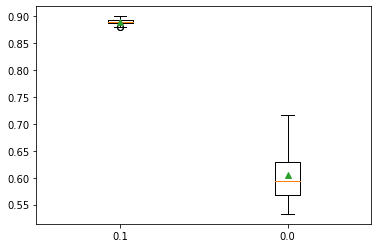

In [ ]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))
# plot model perform4nce for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.808 (0.009)
>2 0.833 (0.006)
>3 0.846 (0.007)
>4 0.850 (0.006)
>5 0.853 (0.006)
>6 0.856 (0.005)
>7 0.860 (0.006)


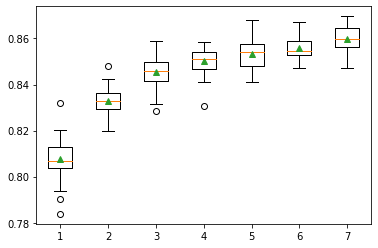

In [ ]:

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 20
	for i in range(1,8):
		models[str(i)] = GradientBoostingClassifier(max_features=i, subsample=0.1, n_estimators=100)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X = df
y = axl["Target"]
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.0001 0.510 (0.000)
>0.0010 0.516 (0.006)
>0.0100 0.830 (0.007)
>0.1000 0.858 (0.004)
>1.0000 0.850 (0.006)


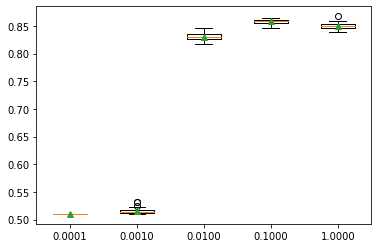

In [ ]:

# get a list of models to evaluate
def get_models():
	models = dict()
	# define learning rates to explore
	for i in [0.0001, 0.001, 0.01, 0.1, 1.0]:
		key = '%.4f' % i
		models[key] = GradientBoostingClassifier(learning_rate=i, max_features=7, subsample=0.1, n_estimators=100)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X = df
y = axl["Target"]
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.949 (0.003)
>2 0.961 (0.005)
>3 0.959 (0.008)
>4 0.840 (0.137)
>5 0.850 (0.098)
>6 0.802 (0.117)
>7 0.826 (0.060)
>8 0.823 (0.034)
>9 0.824 (0.043)
>10 0.830 (0.043)


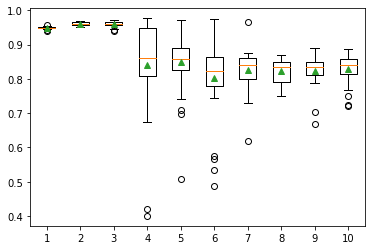

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# define max tree depths to explore between 1 and 10
	for i in range(1,11):
		models[str(i)] = GradientBoostingClassifier(max_depth=i, learning_rate=.1, max_features=7, subsample=0.1, n_estimators=100)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X = df
y = axl["Target"]
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# example of grid searching key hyperparameters for gradient boosting on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X = Xt_train
y = Yt_train
# define the model with default hyperparameters
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [ 100]
grid['learning_rate'] = [  0.1]
grid['max_features'] = [7,20,21,22,23,24,25,26,27,28,29,30]
grid['subsample'] = [0.1]
grid['max_depth'] = [2]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.853085 using {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 29, 'n_estimators': 100, 'subsample': 0.1}
0.842873 (0.006397) with: {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 7, 'n_estimators': 100, 'subsample': 0.1}
0.850349 (0.005541) with: {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 20, 'n_estimators': 100, 'subsample': 0.1}
0.851160 (0.005250) with: {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 21, 'n_estimators': 100, 'subsample': 0.1}
0.850699 (0.005028) with: {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 22, 'n_estimators': 100, 'subsample': 0.1}
0.851154 (0.005025) with: {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 23, 'n_estimators': 100, 'subsample': 0.1}
0.851559 (0.005610) with: {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 24, 'n_estimators': 100, 'subsample': 0.1}
0.850965 (0.006381) with: {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 25, 'n_estimators': 100, 'subsample': 0.1}
0.851832 (0.00

## Training

In [ ]:
# load library
from sklearn.ensemble import GradientBoostingClassifier

xgbc = GradientBoostingClassifier(max_depth=2, learning_rate=.1, max_features=29, subsample=0.1, n_estimators=100)

# fit the predictor and target
xgbc.fit(Xt_train, Yt_train)
xgbc

GradientBoostingClassifier(max_depth=2, max_features=29, subsample=0.1)

In [ ]:
from joblib import Parallel, delayed
import joblib


# Save the model as a pickle in a file
joblib.dump(xgbc, 'asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl')

# Load the model from the file
loaded_model = joblib.load('asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl')


## Creating Unbalanced Asexual test set

In [ ]:
#Original training set
import pandas as pd
axl= pd.read_csv("M_asexuals_lib_hits_nd_clst_nhts.csv")
axl['Hit'] = axl['Hit'].replace(np.nan, "No")
axl = axl.iloc[: , 1:]
print(axl['Hit'].value_counts())
axl

In [ ]:
axl["Target"] = np.where(axl["Hit"]== "Yes", 1,0)
axl["Target"].value_counts()

1    30393
0    29143
Name: Target, dtype: int64

In [ ]:
compounds =[]
df1= axl[:20000]

for _, smiles, hit in df1[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit, smiles))

df2= axl[20001:23766]

for _, smiles, hit in df2[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit, smiles))
df3= axl[23767:25396]

for _, smiles, hit in df3[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit, smiles))


df4= axl[25397:25662]

for _, smiles, hit in df4[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit, smiles))

df5= axl[25663:26912]

for _, smiles, hit in df5[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit, smiles))

df6= axl[26913:28399]

for _, smiles, hit in df6[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit, smiles))
df7= axl[28400:]

for _, smiles, hit in df7[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit, smiles))

len(compounds)

59530

In [ ]:
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'Hit', "Smiles"])
axl=dff
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit


def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

axl["Input"] = axl["mol"].apply(get_input) # adding the input column to the dataframe
axl["Target"] = np.where(axl["Hit"]== "Yes", 1,0)
axl["Target"].value_counts()
axl

In [ ]:
mfp= []
mfp = axl["mol"].apply(get_input) # adding the input column to the dataframe
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
df = pd.DataFrame(mfpdf)
df["Smiles"]= axl["Smiles"]
df

<class 'pandas.core.series.Series'>


0        [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
2        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
4        [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
59525    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
59526    [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...
59527    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
59528    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
59529    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: mol, Length: 59530, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
Xt_train1, Xt_test1, Yt_train1, Yt_test1 = train_test_split(df, axl["Target"],test_size=0.2, random_state=42)

### Unbalanced test set

In [ ]:
##Select those not in train set (Note this dataset does not contain the complete set of hits so need to add those)
sxl= pd.read_csv("/content/Merged_asexual_libraries_hits and nonhits_nd.csv")
as_nhts= sxl[sxl["Hit"]== "No"]
print(len(as_nhts))

df_smiles = as_nhts[['Smiles',"Compound Key", "Hit"]]

,Unnamed: 0,Smiles,CHEMBLID,Hit,Compound Key
0,0,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1,CHEMBL3470688,No,DDD01082494
1,1,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1,CHEMBL3447812,No,DDD01058126
2,2,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,CHEMBL3486462,No,DDD01257825
3,3,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1,CHEMBL3467813,No,DDD01078886
4,4,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,CHEMBL3452692,No,DDD01063562
...,...,...,...,...,...
122566,122566,CC(/C=C/C(=O)NO)=C\[C@@H](C)C(=O)c1ccc(N(C)C)cc1,CHEMBL99,Yes,GNF-Pf-1011
122567,122567,O=[N+]([O-])c1cc([N+](=O)[O-])c2cccnc2c1Nc1ccc...,CHEMBL603032,No,GNF-Pf-1014
122568,122568,COc1ccc2c(c1)N(C(=O)CSc1nc3ccccc3o1)C(C)(C)c1s...,CHEMBL585033,Yes,GNF-Pf-4623
122569,122569,CCN1/C(=C/c2cccc[n+]2C)Sc2ccccc21,CHEMBL583805,Yes,GNF-Pf-1023


In [ ]:
## Compound
compounds = []
df1 = df_smiles. iloc [:1300]
df2 = df_smiles. iloc [1301:2600]
df3 = df_smiles. iloc [2601:3900]
df4 = df_smiles. iloc [3901:4300] #note error observed between compounds 4301-4310
df5 = df_smiles. iloc [4310:4600]

for _, compound_key, smiles in df1[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles  in df2[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles in df3[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles in df4[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles in df5[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key , smiles))

df6 = df_smiles. iloc [4650:5600]
for _, compound_key, smiles in df6[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key , smiles))

df7 = df_smiles. iloc [5700:6150]
for _, compound_key, smiles in df7[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key , smiles))

df8 = df_smiles. iloc [6180:7970]
for _, compound_key, smiles  in df8[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df9 = df_smiles. iloc [8000:10730]
for _, compound_key, smiles  in df9[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df10 = df_smiles. iloc [10740:11410]
for _, compound_key, smiles in df10[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df11 = df_smiles. iloc [11420:14010]
for _, compound_key, smiles in df11[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df12 = df_smiles. iloc [14020:14580]
for _, compound_key, smiles in df12[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df13 = df_smiles. iloc [14590:15794]
for _, compound_key, smiles  in df13[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df14 = df_smiles. iloc [15795:18061]
for _, compound_key, smiles  in df14[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df15 = df_smiles. iloc [18062:20531]
for _, compound_key, smiles  in df15[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df16 = df_smiles. iloc [20532:20964]
for _, compound_key, smiles in df16[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df17 = df_smiles. iloc [20966:22471]
for _, compound_key, smiles in df17[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df18 = df_smiles. iloc [22473:25150]
for _, compound_key, smiles in df18[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df19 = df_smiles. iloc [25153:25549]
for _, compound_key, smiles  in df19[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df20= df_smiles. iloc [25551:28743]
for _, compound_key, smiles in df20[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df21= df_smiles. iloc [28755:30045]
for _, compound_key, smiles  in df21[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df22= df_smiles. iloc [30047:30857]
for _, compound_key, smiles  in df22[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df23= df_smiles. iloc [30859:31442]
for _, compound_key, smiles  in df23[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df24= df_smiles. iloc [31444:31831]
for _, compound_key, smiles in df24[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df25= df_smiles. iloc [31833:33515]
for _, compound_key, smiles  in df25[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df26= df_smiles. iloc [33517:33577]
for _, compound_key, smiles  in df26[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df27= df_smiles. iloc [33579:35623]
for _, compound_key, smiles in df27[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df28= df_smiles. iloc [35625:36239]
for _, compound_key, smiles  in df28[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df29= df_smiles. iloc [36240:38411]
for _, compound_key, smiles in df29[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df30= df_smiles. iloc [38413:38536]
for _, compound_key, smiles in df30[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df31= df_smiles. iloc [38538:39460]
for _, compound_key, smiles in df31[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df32= df_smiles. iloc [39462:39880]
for _, compound_key, smiles in df32[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df33= df_smiles. iloc [39882:44468]
for _, compound_key, smiles  in df33[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df34= df_smiles. iloc [44479:45910]
for _, compound_key, smiles  in df34[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df35= df_smiles. iloc [45912:50308]
for _, compound_key, smiles in df35[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df36= df_smiles. iloc [50310:50644]
for _, compound_key, smiles in df36[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df37= df_smiles. iloc [50646:50847]
for _, compound_key, smiles in df37[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df38= df_smiles. iloc [50849:51016]
for _, compound_key, smiles  in df38[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df39= df_smiles. iloc [51018:52255]
for _, compound_key, smiles  in df39[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df40= df_smiles. iloc [52257:52515]
for _, compound_key, smiles  in df40[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df41= df_smiles. iloc [52517:54570]
for _, compound_key, smiles in df41[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df42= df_smiles. iloc [54572:56375]
for _, compound_key, smiles in df42[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df43= df_smiles. iloc [56377:57950]
for _, compound_key, smiles  in df43[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df44= df_smiles. iloc [57952:60363]
for _, compound_key, smiles  in df44[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df45= df_smiles. iloc [60365:61892]
for _, compound_key, smiles in df45[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df46= df_smiles. iloc [61894:86486]
for _, compound_key, smiles in df46[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df47= df_smiles. iloc [86488:87067]
for _, compound_key, smiles in df47[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df48= df_smiles. iloc [87069:89383]
for _, compound_key, smiles  in df48[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df49= df_smiles. iloc [89385:90154]
for _, compound_key, smiles in df49[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df50= df_smiles. iloc [90156:90354]
for _, compound_key, smiles in df50[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df51= df_smiles. iloc [90356:90609]
for _, compound_key, smiles  in df51[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df52= df_smiles. iloc [90611:90746]
for _, compound_key, smiles in df52[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df53= df_smiles. iloc [90748:92006]
for _, compound_key, smiles  in df53[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df54= df_smiles. iloc [92008:]
for _, compound_key, smiles  in df54[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

len(compounds)

91817

In [ ]:
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'Hit', "Smiles"])
sxl=dff
sxl

,mol,Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f1beb8066c0>,No,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1
1,<rdkit.Chem.rdchem.Mol object at 0x7f1beb806340>,No,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1
2,<rdkit.Chem.rdchem.Mol object at 0x7f1beb806110>,No,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2
3,<rdkit.Chem.rdchem.Mol object at 0x7f1beb806650>,No,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1
4,<rdkit.Chem.rdchem.Mol object at 0x7f1beb806490>,No,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1
...,...,...,...
91812,<rdkit.Chem.rdchem.Mol object at 0x7f1c21429230>,No,O=C(CNCCc1ccccc1)NC(c1ccccc1)c1ccccc1.O=CO.O=CO
91813,<rdkit.Chem.rdchem.Mol object at 0x7f1c214292a0>,No,Cc1ccc(COc2ccc3c(C#N)c4ccccn4c3c2)cc1
91814,<rdkit.Chem.rdchem.Mol object at 0x7f1c21429310>,No,O=C(CN1CCN(S(=O)(=O)c2cccc([N+](=O)[O-])c2)CC1...
91815,<rdkit.Chem.rdchem.Mol object at 0x7f1c21429380>,No,CC(C)N(CC(=O)Nc1cc(C(C)(C)C)nn1-c1ccc(Cl)c(Cl)...


In [ ]:
import pandas as pd
# Add complete set of hits
axl= pd.read_csv("M_asexuals_lib_hits_nd_clst_nhts.csv")
axl['Hit'] = axl['Hit'].replace(np.nan, "No")
axl = axl.iloc[: , 1:]
print(axl['Hit'].value_counts())
axl

/content/drive/MyDrive/PhD/PTS_datasets
Yes    30393
No     29143
Name: Hit, dtype: int64


,Smiles,Hit
0,Cc1cccnc1CN1CC[C@H](Oc2cccc(F)c2)[C@@](C)(O)C1,Yes
1,CC(C)(C)C(=O)N1C[C@H](c2ccsc2)[C@H]2CN(C3CCCCC...,Yes
2,CC(C)N(CCNC(=O)c1[nH]nc2ccc(I)cc12)C(C)C,Yes
3,CC(Nc1nc(-c2ccncc2)nc2c1CCNC2)c1ccccc1,Yes
4,CC(C)C[C@H](N)COc1cccc(F)c1Oc1cccc(Cl)c1,Yes
...,...,...
59531,O=C1CC[C@H]2[C@H](CCN2C(=O)C2CCOC2)N1Cc1ccncc1,No
59532,Cc1cc(Nc2ccc(F)cn2)cc(C2CCN(Cc3ncc[nH]3)C2)n1,No
59533,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,No
59534,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,No


In [ ]:
compounds =[]
df1= axl[:20000]

for _, smiles, hit in df1[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df2= axl[20001:23766]

for _, smiles, hit in df2[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df3= axl[23767:25396]

for _, smiles, hit in df3[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))


df4= axl[25397:25662]

for _, smiles, hit in df4[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df5= axl[25663:26912]

for _, smiles, hit in df5[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df6= axl[26913:28399]

for _, smiles, hit in df6[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df7= axl[28400:]

for _, smiles, hit in df7[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

len(compounds)

59530

In [ ]:
#Append two dataframes (one containing complete inactive compound set and the other containing
# complete active compound set)
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'Hit', "Smiles"])
axl2=dff
as_ht= axl2[axl2["Hit"]== "Yes"]
axl= sxl.append(as_ht)
axl = axl.reset_index(drop=True)


In [ ]:
# Remove SMILES that are in the training set for model training
df3 = axl.loc[~axl['Smiles'].isin(Xt_train1['Smiles'])].copy()
# shuffle the DataFrame rows
df3 = df3.sample(frac = 1)
axl=df3
axl

<ipython-input-28-71be01537f27>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  axl= sxl.append(as_ht)


,mol,Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f1beb8066c0>,No,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1
1,<rdkit.Chem.rdchem.Mol object at 0x7f1beb806340>,No,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1
2,<rdkit.Chem.rdchem.Mol object at 0x7f1beb806110>,No,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2
3,<rdkit.Chem.rdchem.Mol object at 0x7f1beb806650>,No,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1
4,<rdkit.Chem.rdchem.Mol object at 0x7f1beb806490>,No,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1
...,...,...,...
122199,<rdkit.Chem.rdchem.Mol object at 0x7f1c211f1e00>,Yes,COc1ccc(C(C)=NNc2nnc(C)c(O)n2)cc1
122200,<rdkit.Chem.rdchem.Mol object at 0x7f1c211f1e70>,Yes,CC(/C=C/C(=O)NO)=C\[C@@H](C)C(=O)c1ccc(N(C)C)cc1
122201,<rdkit.Chem.rdchem.Mol object at 0x7f1c211f1ee0>,Yes,COc1ccc2c(c1)N(C(=O)CSc1nc3ccccc3o1)C(C)(C)c1s...
122202,<rdkit.Chem.rdchem.Mol object at 0x7f1c211f1f50>,Yes,CCN1/C(=C/c2cccc[n+]2C)Sc2ccccc21


In [ ]:
## Convert test set mols into Mfp
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
axl["Hit"].value_counts()
def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

#axl["Input"] = axl["mol"].apply(get_input) # adding the input column to the dataframe
axl["Target"] = np.where(axl["Hit"]== "Yes", 1,0)
axl["Target"].value_counts()
axl

,mol,Hit,Smiles,Target
32262,<rdkit.Chem.rdchem.Mol object at 0x7f1c21ddcba0>,No,CCS(=O)(=O)N1CCC2(CC(=O)N(c3cccc(C)c3)C2)C1,0
22661,<rdkit.Chem.rdchem.Mol object at 0x7f1c23a3f610>,No,Cc1cc(C(=O)CN2C(=O)c3ccccc3CS2(=O)=O)c(C)[nH]1,0
28881,<rdkit.Chem.rdchem.Mol object at 0x7f1c21f3b300>,No,CCn1cc(CNC2CCN(c3cccc(Cl)c3)C2)cn1,0
26053,<rdkit.Chem.rdchem.Mol object at 0x7f1c21ec1310>,No,COc1cc(N2C[C@@H]3COC[C@]3(COCc3ccccn3)C2)ncn1,0
24909,<rdkit.Chem.rdchem.Mol object at 0x7f1c21e957e0>,No,COCc1nc(C(=O)N2CCN(c3nccc(OC)n3)CC2)cs1,0
...,...,...,...,...
82363,<rdkit.Chem.rdchem.Mol object at 0x7f1c21683df0>,No,CCCCNc1c(C(=O)OCC)c(C)nc2c1[nH]c1ccccc12,0
59195,<rdkit.Chem.rdchem.Mol object at 0x7f1c21a80b30>,No,COc1ccc(-c2c[nH]c(C3CC(=O)N(CC(C)C)C3)n2)cc1,0
62561,<rdkit.Chem.rdchem.Mol object at 0x7f1c218a9af0>,No,CN1CCN(C2CCN(CCOc3cccc(Cl)c3)CC2)C1=O,0
18045,<rdkit.Chem.rdchem.Mol object at 0x7f1c23bf86d0>,No,Cc1nc(CCNC(=O)NCC(c2ccco2)N(C)C)cs1,0


In [ ]:
mfp= []
mfp = axl["mol"].apply(get_input) # adding the input column to the dataframe
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
df = pd.DataFrame(mfpdf)
Xt_test = df
Yt_test= axl["Target"]

0    58241
1     2788
Name: Target, dtype: int64


#GBM

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib


In [ ]:

gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MFP/asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl')

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


xgbc_predict = gbm_model.predict(Xt_test)
p= xgbc_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    45949
1    15080
dtype: int64


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,xgbc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,xgbc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,xgbc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,xgbc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,xgbc_predict)
cm

Accuracy: 0.782530
Recall 0.824247
precision 0.152387
F1 score: 0.257220


array([[45459, 12782],
       [  490,  2298]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, xgbc_predict))
print('Accuracy score:',accuracy_score(Yt_test, xgbc_predict))
print('F1 score:',f1_score(Yt_test,xgbc_predict))

ROCAUC score: 0.8023896931803454
Accuracy score: 0.7825296170672958
F1 score: 0.2572196104768301


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, xgbc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, xgbc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, xgbc_predict)
print(matrix)

Cohens kappa: 0.195158
ROC AUC: 0.802390
[[45459 12782]
 [  490  2298]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

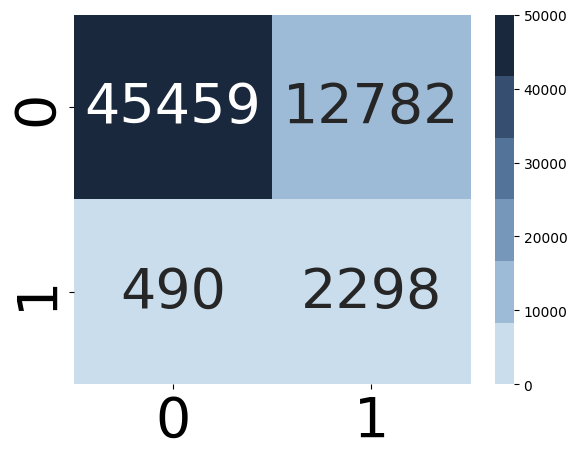

In [ ]:
import seaborn as sns
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
cm=[[45459 ,12782],
 [  490 , 2298]]
fig, ax = plt.subplots()
ax.tick_params(labelsize=40)
#ax.legend(markerscale=15)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=50000)# font size
plt.savefig('ABS_GBM_UB_testMat.png',dpi=300, bbox_inches='tight')
from google.colab import files
files.download("ABS_GBM_UB_testMat.png")

# Dual active models

In [ ]:
!time pip install rdkit-pypi==2021.09.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 29.2 MB/s eta 0:00:00

real	0m14.603s
user	0m8.286s
sys	0m0.924s


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style
import random
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [ ]:
############################################Sexual data
import pandas as pd
sxl= pd.read_csv("M_sexual_LibrariesC_hits_nd_2ndclst_nhits.csv")
sxl['S_Hit'] = sxl['S_Hit'].replace(np.nan, "No")
sxl = sxl.iloc[: , 1:]
print(sxl['S_Hit'].value_counts())
sxl["Target"] = np.where(sxl["S_Hit"]== "Yes", 1,0)
sxl["Target"].value_counts()

# Molecular Morgan Fingerprint (MFP)

,Smiles,S_Hit,Target,ROMol,Input
0,NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12,Yes,1,,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1,Yes,1,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,COc1c(C)cnc(CN(C)C2CCCCC2)c1C,Yes,1,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1,Yes,1,,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
4,CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C,Yes,1,,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
...,...,...,...,...,...
9886,Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1,No,0,,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."
9887,COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21,No,0,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
9888,CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2,No,0,,"[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
9889,CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1,No,0,,"[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."

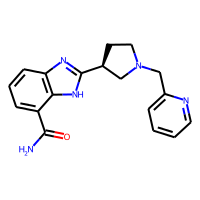
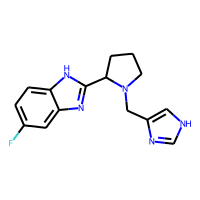
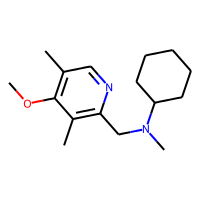
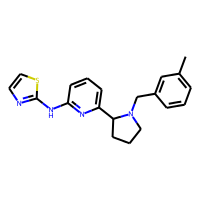
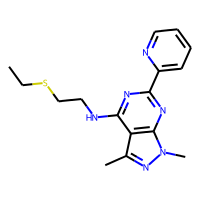
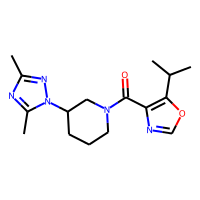
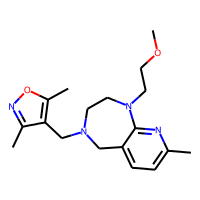
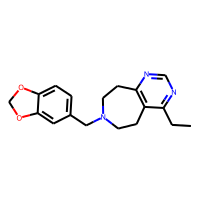
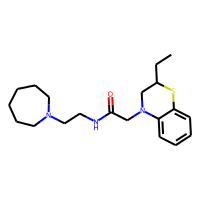
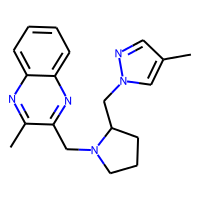

In [ ]:
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
PandasTools.AddMoleculeColumnToFrame(sxl,smilesCol="Smiles")
sxl.head()

def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

sxl["Input"] = sxl["ROMol"].apply(get_input) # adding the input column to the dataframe
sxl["Target"] = np.where(sxl["S_Hit"]== "Yes", 1,0)
sxl["Target"].value_counts()
sxl

In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style
mfp= []
mfp = sxl["ROMol"].apply(get_input) # adding the input column to the dataframe
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
df = pd.DataFrame(mfpdf)
df

In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, sxl["Target"],test_size=0.2, random_state=42)

# Hyperparameter Tuning

---

Random Forest Hyperparameters we’ll be Looking at:

*   Number of trees (n_estimators)
*   Number of Samples (subsample)
*   Number of Features (max_features)
*   Learning Rate
*   Tree Depth (max_depth)
---
https://machinelearningmastery.com/gradient-boosting-machine-ensemble-in-python/
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/

In [ ]:

# evaluate gradient boosting algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:

# explore gradient boosting number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = GradientBoostingClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X = df
y = sxl["Target"]

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>10 0.916 (0.002)
>50 0.952 (0.005)
>100 0.965 (0.005)
>500 0.978 (0.003)


KeyboardInterrupt: ignored

>0.1 0.7814 (0.2290)
>0.0 0.7458 (0.1996)


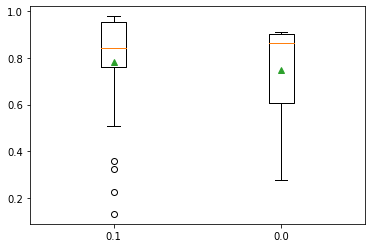

In [ ]:

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore sample ratio from 10% to 100% in 10% increments
	for i in (0.1, 0.01, 0.001):
		key = '%.1f' % i
		models[key] = GradientBoostingClassifier(subsample=i, n_estimators=500)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X = df
y = sxl["Target"]

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))
# plot model perform4nce for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.1 0.8833 (0.1657)
>0.0 0.7676 (0.1996)


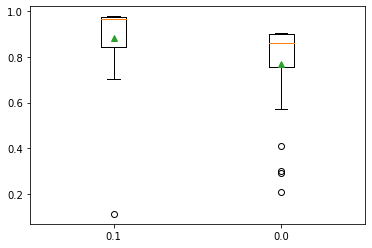

In [ ]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))
# plot model perform4nce for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.948 (0.004)
>2 0.958 (0.004)
>3 0.960 (0.005)
>4 0.959 (0.008)
>5 0.961 (0.006)
>6 0.959 (0.012)
>7 0.945 (0.037)
>8 0.953 (0.019)
>9 0.944 (0.041)
>10 0.908 (0.099)


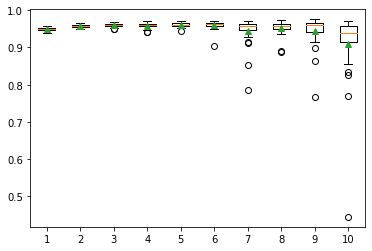

In [ ]:

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 20
	for i in range(1,11):
		models[str(i)] = GradientBoostingClassifier(max_features=i, subsample=0.1, n_estimators=500)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X = df
y = sxl["Target"]
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.0001 0.907 (0.000)
>0.0010 0.907 (0.000)
>0.0100 0.918 (0.003)
>0.1000 0.960 (0.006)
>1.0000 0.702 (0.191)


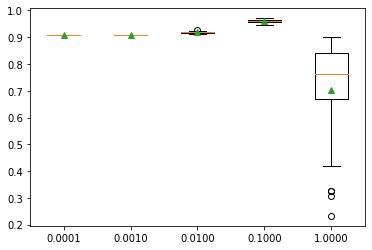

In [ ]:

# get a list of models to evaluate
def get_models():
	models = dict()
	# define learning rates to explore
	for i in [0.0001, 0.001, 0.01, 0.1, 1.0]:
		key = '%.4f' % i
		models[key] = GradientBoostingClassifier(learning_rate=i, max_features=5, subsample=0.1, n_estimators=500)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X = df
y = sxl["Target"]
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.949 (0.003)
>2 0.961 (0.005)
>3 0.959 (0.008)
>4 0.840 (0.137)
>5 0.850 (0.098)
>6 0.802 (0.117)
>7 0.826 (0.060)
>8 0.823 (0.034)
>9 0.824 (0.043)
>10 0.830 (0.043)


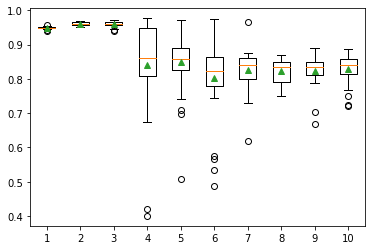

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# define max tree depths to explore between 1 and 10
	for i in range(1,11):
		models[str(i)] = GradientBoostingClassifier(max_depth=i, learning_rate=.1, max_features=5, subsample=0.1, n_estimators=500)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X = df
y = sxl["Target"]
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# example of grid searching key hyperparameters for gradient boosting on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X = Xt_train
y = Yt_train
# define the model with default hyperparameters
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [ 500]
grid['learning_rate'] = [  0.1]
grid['max_features'] = [5]
grid['subsample'] = [0.1]
grid['max_depth'] = [2,3, 9]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.958417 using {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 5, 'n_estimators': 500, 'subsample': 0.1}
0.958417 (0.009926) with: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 5, 'n_estimators': 500, 'subsample': 0.1}
0.788846 (0.092147) with: {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 5, 'n_estimators': 500, 'subsample': 0.1}
0.807924 (0.077203) with: {'learning_rate': 0.1, 'max_depth': 9, 'max_features': 5, 'n_estimators': 500, 'subsample': 0.1}


## Training

In [ ]:
######################################################################XGBoost (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
# load library
from sklearn.ensemble import GradientBoostingClassifier

xgbc = GradientBoostingClassifier(max_depth=2, learning_rate=.1, max_features=5, subsample=0.1, n_estimators=500)

# fit the predictor and target
xgbc.fit(Xt_train, Yt_train)

# predict
xgbc_predict = xgbc.predict(Xt_test)# check performance


In [ ]:
xgbc

GradientBoostingClassifier(max_depth=2, max_features=5, n_estimators=500,
                           subsample=0.1)

In [ ]:
from joblib import Parallel, delayed
import joblib


# Save the model as a pickle in a file
joblib.dump(xgbc, 'sexualsGBMFinalHPT_UMFP_model5005.pkl')

# Load the model from the file
loaded_model = joblib.load('sexualsGBMFinalHPT_UMFP_model5005.pkl')


## Creating Unbalanced Dual active test set

In [ ]:
import pandas as pd
sxl= pd.read_csv("M_sexual_LibrariesC_hits_nd_2ndclst_nhits.csv")
sxl['S_Hit'] = sxl['S_Hit'].replace(np.nan, "No")
sxl = sxl.iloc[: , 1:]
print(sxl['S_Hit'].value_counts())
sxl

In [ ]:
sxl["Target"] = np.where(sxl["S_Hit"]== "Yes", 1,0)
sxl["Target"].value_counts()

0    8975
1     916
Name: Target, dtype: int64

,Smiles,S_Hit,Target,ROMol,Input
0,NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12,Yes,1,,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1,Yes,1,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,COc1c(C)cnc(CN(C)C2CCCCC2)c1C,Yes,1,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1,Yes,1,,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
4,CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C,Yes,1,,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
...,...,...,...,...,...
9886,Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1,No,0,,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."
9887,COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21,No,0,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
9888,CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2,No,0,,"[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
9889,CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1,No,0,,"[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."

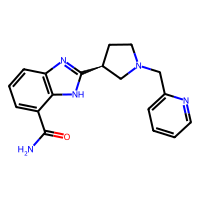
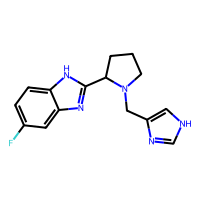
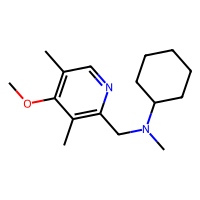
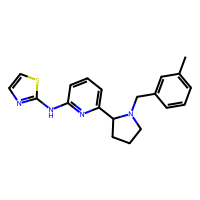
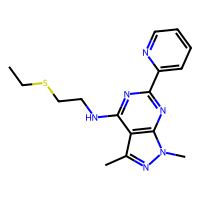
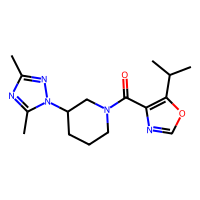
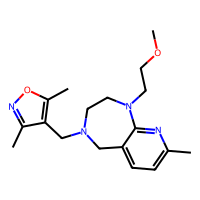
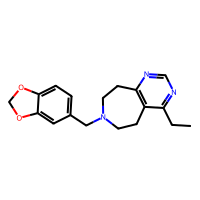
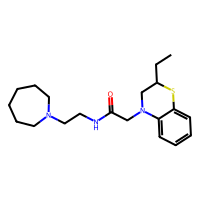
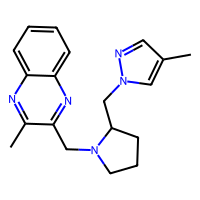

In [ ]:
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
PandasTools.AddMoleculeColumnToFrame(sxl,smilesCol="Smiles")
sxl.head()

def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

sxl["Input"] = sxl["ROMol"].apply(get_input) # adding the input column to the dataframe
sxl["Target"] = np.where(sxl["S_Hit"]== "Yes", 1,0)
sxl["Target"].value_counts()
sxl

In [ ]:
mfp= []
mfp = sxl["ROMol"].apply(get_input) # adding the input column to the dataframe
print(type(mfp))
mfp

<class 'pandas.core.series.Series'>


0       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
4       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
                              ...                        
9886    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...
9887    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
9888    [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
9889    [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
9890    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
Name: ROMol, Length: 9891, dtype: object

In [ ]:
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
print(type(mfpdf))
mfpdf

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9888,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9889,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df=[]
df = pd.DataFrame(mfpdf)
df["Smiles"]= sxl["Smiles"]
df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,Smiles
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COc1c(C)cnc(CN(C)C2CCCCC2)c1C
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1
9887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21
9888,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2
9889,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1


In [ ]:
from sklearn.model_selection import train_test_split
Xt_train1, Xt_test1, Yt_train1, Yt_test1 = train_test_split(df, sxl["Target"],test_size=0.2, random_state=42)

## Unbalanced test set

In [ ]:
##Select those not in train set
sxl= pd.read_csv("Merged_sexual_libraries_hits and nonhits_nd.csv")
print(sxl["S_Hit"].count())
nht= sxl[sxl["S_Hit"]== "No"]
nhts= nht[["Smiles", "S_Hit"]]
nhts = nhts.reset_index(drop=True)
nhts

/content
69011


,Smiles,S_Hit
0,Cc1cnn(CC2CCCCN2Cc2nnsc2Cl)c1,No
1,CC(=O)N1CC[C@H]2CC(=O)N(C3CCCCC3)CC[C@H]2C1,No
2,Cc1cc(=O)[nH]c(=O)n1-c1cccc(Cl)c1Cl,No
3,COC(=O)c1ccccc1S(=O)(=O)NC(=O)c1cccc2c1OCCO2,No
4,Cc1noc(C2CCCN(C(=O)c3ccc(N(C)C)nc3)C2)n1,No
...,...,...
68796,CC(=O)Nc1nnc(SCc2c(C)cc(cc2C)C(C)(C)C)s1,No
68797,Cc1ccc(cc1)S(=O)(=O)c2c(COC(=O)c3cccc(C)c3)c(n...,No
68798,COc1ccc(OC)c(c1)C2C3=C(CC(C)(C)CC3=O)N(C4=C2C(...,No
68799,Cc1cc(C=C2SC(=Nc3ccccc3)N(C4CCCC4)C2=O)c(C)n1c...,No


In [ ]:
############################################Sexual data
import pandas as pd
sxl1= pd.read_csv("M_sexual_LibrariesC_hits_nd_2ndclst_nhits.csv")
sxl1['S_Hit'] = sxl1['S_Hit'].replace(np.nan, "No")
sxl1 = sxl1.iloc[: , 1:]
print(sxl1['S_Hit'].value_counts())
sxl1
ht= sxl1[sxl1["S_Hit"]== "Yes"]
ht = ht.reset_index(drop=True)
ht


/content/drive/MyDrive/PhD/PTS_datasets
No     8975
Yes     916
Name: S_Hit, dtype: int64


,Smiles,S_Hit
0,NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12,Yes
1,Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1,Yes
2,COc1c(C)cnc(CN(C)C2CCCCC2)c1C,Yes
3,Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1,Yes
4,CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C,Yes
...,...,...
9886,Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1,No
9887,COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21,No
9888,CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2,No
9889,CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1,No


In [ ]:
sxl= nhts.append(ht)
sxl = sxl.reset_index(drop=True)
df_smiles = sxl

<ipython-input-19-9d4f6c643dad>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sxl= nhts.append(ht)


,Smiles,S_Hit
0,Cc1cnn(CC2CCCCN2Cc2nnsc2Cl)c1,No
1,CC(=O)N1CC[C@H]2CC(=O)N(C3CCCCC3)CC[C@H]2C1,No
2,Cc1cc(=O)[nH]c(=O)n1-c1cccc(Cl)c1Cl,No
3,COC(=O)c1ccccc1S(=O)(=O)NC(=O)c1cccc2c1OCCO2,No
4,Cc1noc(C2CCCN(C(=O)c3ccc(N(C)C)nc3)C2)n1,No
...,...,...
69712,COc1cc2nc(N3CCC(CCCC4CCNCC4)CC3)nc(NCc3ccccn3)...,Yes
69713,Cc1ccc(Cl)c2sc(N3CCN(C(=O)c4ccc([N+](=O)[O-])o...,Yes
69714,CCCCCCCN1CC[C@@H](CCCc2ccnc3ccc(OC)cc23)[C@@H]...,Yes
69715,CN(C)CCNCc1cccc(-c2ccc3c(Nc4ccc(Oc5ccccn5)cc4)...,Yes


In [ ]:
## Compound
compounds = []

df1 = df_smiles. iloc [:176]
for _, compound_key, smiles in df1[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df2 = df_smiles. iloc [177:637]
for _, compound_key, smiles in df2[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df3 = df_smiles. iloc [638:880]
for _, compound_key, smiles in df3[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df4 = df_smiles. iloc [881:2160]
for _, compound_key, smiles in df4[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df5 = df_smiles. iloc [2161:2662]
for _, compound_key, smiles in df5[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df6 = df_smiles. iloc [2663:4273]
for _, compound_key, smiles in df6[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df7 = df_smiles. iloc [4274:8027]
for _, compound_key, smiles in df7[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df8 = df_smiles. iloc [8028:8749]
for _, compound_key, smiles in df8[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df9 = df_smiles. iloc [8750:9132]
for _, compound_key, smiles in df9[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df10 = df_smiles. iloc [9133:9993]
for _, compound_key, smiles in df10[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df11 = df_smiles. iloc [9994:15541]
for _, compound_key, smiles in df11[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df12 = df_smiles. iloc [15544:17608]
for _, compound_key, smiles in df12[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df13 = df_smiles. iloc [17609:18039]
for _, compound_key, smiles in df13[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df14 = df_smiles. iloc [18040:19840]
for _, compound_key, smiles in df14[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df15 = df_smiles. iloc [19841:21008]
for _, compound_key, smiles in df15[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df16 = df_smiles. iloc [21009:23464]
for _, compound_key, smiles in df16[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df17 = df_smiles. iloc [23465:24399]
for _, compound_key, smiles in df17[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df18 = df_smiles. iloc [24400:24499]
for _, compound_key, smiles in df18[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df19 = df_smiles. iloc [24500:27475]
for _, compound_key, smiles in df19[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df20 = df_smiles. iloc [27476:29517]
for _, compound_key, smiles in df20[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df21 = df_smiles. iloc [29518:32330]
for _, compound_key, smiles in df21[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df22 = df_smiles. iloc [32331:34028]
for _, compound_key, smiles in df22[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))
df23 = df_smiles. iloc [34029:36109]
for _, compound_key, smiles in df23[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df24 = df_smiles. iloc [36110:39916]
for _, compound_key, smiles in df24[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df25 = df_smiles. iloc [39917:40726]
for _, compound_key, smiles in df25[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


df26 = df_smiles. iloc [40727:42620]
for _, compound_key, smiles in df26[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df27 = df_smiles. iloc [42624:42974]
for _, compound_key, smiles in df27[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df28 = df_smiles. iloc [42975:45122]
for _, compound_key, smiles in df28[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


df29 = df_smiles. iloc [45123:45283]
for _, compound_key, smiles in df29[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df30 = df_smiles. iloc [45284:46911]
for _, compound_key, smiles in df30[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df31 = df_smiles. iloc [46912:49127]
for _, compound_key, smiles in df31[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df32 = df_smiles. iloc [49128:50625]
for _, compound_key, smiles in df32[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df33 = df_smiles. iloc [50626:51114]
for _, compound_key, smiles in df33[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df34 = df_smiles. iloc [51115:53592]
for _, compound_key, smiles in df34[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df35 = df_smiles. iloc [53593:54321]
for _, compound_key, smiles in df35[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df36 = df_smiles. iloc [54322:54557]
for _, compound_key, smiles in df36[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df37 = df_smiles. iloc [54558:55534]
for _, compound_key, smiles in df37[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df38 = df_smiles. iloc [55536:55615]
for _, compound_key, smiles in df38[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df39 = df_smiles. iloc [55617:59191]
for _, compound_key, smiles in df39[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df40 = df_smiles. iloc [59192:61821]
for _, compound_key, smiles in df40[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df41 = df_smiles. iloc [61822:62027]
for _, compound_key, smiles in df41[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df42 = df_smiles. iloc [62028:63298]
for _, compound_key, smiles in df42[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df43 = df_smiles. iloc [63299:63676]
for _, compound_key, smiles in df43[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df44 = df_smiles. iloc [63677:68352]
for _, compound_key, smiles in df44[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df45 = df_smiles. iloc [68353:]
for _, compound_key, smiles in df45[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


In [ ]:
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'S_Hit', "Smiles"])
sxl=dff
sxl

,mol,S_Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7fc3b4541a10>,No,Cc1cnn(CC2CCCCN2Cc2nnsc2Cl)c1
1,<rdkit.Chem.rdchem.Mol object at 0x7fc3b45415b0>,No,CC(=O)N1CC[C@H]2CC(=O)N(C3CCCCC3)CC[C@H]2C1
2,<rdkit.Chem.rdchem.Mol object at 0x7fc3b4541540>,No,Cc1cc(=O)[nH]c(=O)n1-c1cccc(Cl)c1Cl
3,<rdkit.Chem.rdchem.Mol object at 0x7fc3b45413f0>,No,COC(=O)c1ccccc1S(=O)(=O)NC(=O)c1cccc2c1OCCO2
4,<rdkit.Chem.rdchem.Mol object at 0x7fc3b45412a0>,No,Cc1noc(C2CCCN(C(=O)c3ccc(N(C)C)nc3)C2)n1
...,...,...,...
69661,<rdkit.Chem.rdchem.Mol object at 0x7fc3b34cfae0>,Yes,COc1cc2nc(N3CCC(CCCC4CCNCC4)CC3)nc(NCc3ccccn3)...
69662,<rdkit.Chem.rdchem.Mol object at 0x7fc3b34cfb50>,Yes,Cc1ccc(Cl)c2sc(N3CCN(C(=O)c4ccc([N+](=O)[O-])o...
69663,<rdkit.Chem.rdchem.Mol object at 0x7fc3b34cfbc0>,Yes,CCCCCCCN1CC[C@@H](CCCc2ccnc3ccc(OC)cc23)[C@@H]...
69664,<rdkit.Chem.rdchem.Mol object at 0x7fc3b34cfc30>,Yes,CN(C)CCNCc1cccc(-c2ccc3c(Nc4ccc(Oc5ccccn5)cc4)...


In [ ]:
df3 = sxl.loc[~sxl['Smiles'].isin(Xt_train1['Smiles'])].copy()
# shuffle the DataFrame rows
df3 = df3.sample(frac = 1)
sxl=df3
sxl

,mol,S_Hit,Smiles
33991,<rdkit.Chem.rdchem.Mol object at 0x7fc3b3dc21f0>,No,CC(C)Oc1cccc2c1c(NC(=O)CN(C)C)nn2CC(F)(F)F
68769,<rdkit.Chem.rdchem.Mol object at 0x7fc3b34a7140>,Yes,CCc1c(-c2ccccc2)nc2c(c(C)c(C)n2CCN(C)C)c1N
29581,<rdkit.Chem.rdchem.Mol object at 0x7fc3b3efc6d0>,No,Cc1cc(CN(CCCO)c2ccccc2)on1
13351,<rdkit.Chem.rdchem.Mol object at 0x7fc3b422bed0>,No,CCCc1noc(-c2cn(CC(=O)N(CC)CC)nn2)n1
15429,<rdkit.Chem.rdchem.Mol object at 0x7fc3b4089460>,No,O=C(c1ccccn1)N1CCN(c2cnnc(N3CCCC3)c2)CC1
...,...,...,...
64363,<rdkit.Chem.rdchem.Mol object at 0x7fc3b35e57e0>,No,N#Cc1ccc(C(=O)N(Cc2ccncc2)C2CC2)cc1
41138,<rdkit.Chem.rdchem.Mol object at 0x7fc3b3ae3ae0>,No,CC1(C(N)=O)CN(CC2CCOCC2)CCO1
62527,<rdkit.Chem.rdchem.Mol object at 0x7fc3b3596ab0>,No,N#Cc1ccc(NCCNc2ccc(C(F)(F)F)cn2)nc1
58523,<rdkit.Chem.rdchem.Mol object at 0x7fc3b36e00b0>,No,Cc1noc(CN(C)C(=O)CCn2cnc3ccccc32)n1


In [ ]:
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
#PandasTools.AddMoleculeColumnToFrame(sxl,smilesCol="Smiles")
#sxl.head()

def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

sxl["Input"] = sxl["mol"].apply(get_input) # adding the input column to the dataframe
sxl["Target"] = np.where(sxl["S_Hit"]== "Yes", 1,0)
sxl["Target"].value_counts()
sxl

,mol,S_Hit,Smiles,Input,Target
33991,<rdkit.Chem.rdchem.Mol object at 0x7fc3b3dc21f0>,No,CC(C)Oc1cccc2c1c(NC(=O)CN(C)C)nn2CC(F)(F)F,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...",0
68769,<rdkit.Chem.rdchem.Mol object at 0x7fc3b34a7140>,Yes,CCc1c(-c2ccccc2)nc2c(c(C)c(C)n2CCN(C)C)c1N,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
29581,<rdkit.Chem.rdchem.Mol object at 0x7fc3b3efc6d0>,No,Cc1cc(CN(CCCO)c2ccccc2)on1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
13351,<rdkit.Chem.rdchem.Mol object at 0x7fc3b422bed0>,No,CCCc1noc(-c2cn(CC(=O)N(CC)CC)nn2)n1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0
15429,<rdkit.Chem.rdchem.Mol object at 0x7fc3b4089460>,No,O=C(c1ccccn1)N1CCN(c2cnnc(N3CCCC3)c2)CC1,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...,...,...,...
64363,<rdkit.Chem.rdchem.Mol object at 0x7fc3b35e57e0>,No,N#Cc1ccc(C(=O)N(Cc2ccncc2)C2CC2)cc1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",0
41138,<rdkit.Chem.rdchem.Mol object at 0x7fc3b3ae3ae0>,No,CC1(C(N)=O)CN(CC2CCOCC2)CCO1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",0
62527,<rdkit.Chem.rdchem.Mol object at 0x7fc3b3596ab0>,No,N#Cc1ccc(NCCNc2ccc(C(F)(F)F)cn2)nc1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
58523,<rdkit.Chem.rdchem.Mol object at 0x7fc3b36e00b0>,No,Cc1noc(CN(C)C(=O)CCn2cnc3ccccc32)n1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:
mfp= []
mfp = sxl["mol"].apply(get_input) # adding the input column to the dataframe
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
df = pd.DataFrame(mfpdf)
df

In [ ]:
Xt_test = df
Yt_test= sxl["Target"]

#GBM

In [ ]:

gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MFP/sexualsGBMFinalHPT_UMFP_model5005.pkl')

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


xgbc_predict = gbm_model.predict(Xt_test)
p= xgbc_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    61992
1      383
dtype: int64


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,xgbc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,xgbc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,xgbc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,xgbc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,xgbc_predict)
cm

Accuracy: 0.993940
Recall 0.521368
precision 0.159269
F1 score: 0.244000


array([[61936,   322],
       [   56,    61]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, xgbc_predict))
print('Accuracy score:',accuracy_score(Yt_test, xgbc_predict))
print('F1 score:',f1_score(Yt_test,xgbc_predict))

ROCAUC score: 0.75809774764126
Accuracy score: 0.993939879759519
F1 score: 0.24399999999999997


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, xgbc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, xgbc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, xgbc_predict)
print(matrix)

Cohens kappa: 0.241821
ROC AUC: 0.758098
[[61936   322]
 [   56    61]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

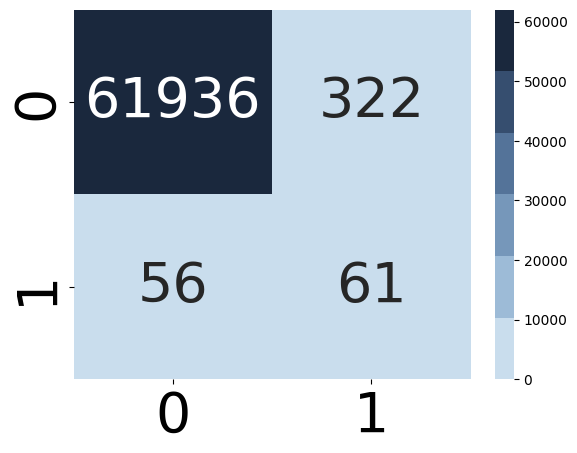

In [ ]:
import seaborn as sns
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
cm=[[61936 ,  322],
 [   56  ,  61]]
fig, ax = plt.subplots()
ax.tick_params(labelsize=40)
#ax.legend(markerscale=15)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=62000)# font size
plt.savefig('Dual_GBM_UB_testMat.png',dpi=300, bbox_inches='tight')
from google.colab import files
files.download("Dual_GBM_UB_testMat.png")